# **Глава 3**: *Статистические экспиременты и проверка значимости*

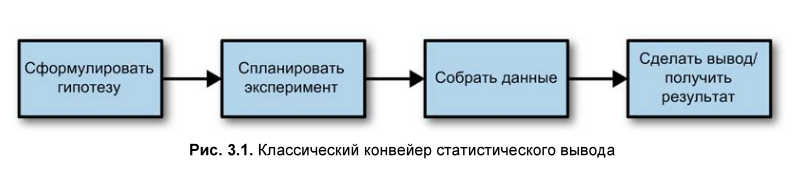

## A/B тестирование
* Зачем нужна контрольная группа?
* Почему A/B? Почему не C, D...?

## Проверка гипотез
* Нулевая гипотеза
* Односторонняя проверка гипотезы против двухсторонней

## Повторный отбор
* Перестановочный тест
* Пример: прилипчивость веб-страниц
* Исчерпывающий и бутстраповский перестановочный тест
* Перестановочные тесты: сухой остаток для науки о данных

### Пример перестановочного теста - прилипчивость веб-страниц

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy

In [2]:
web_pages_df = pd.read_csv('/home/renat/Desktop/programming/data_science/books/prac_stat_for_ds_bruce_pratec/data/09_web_pages_data.csv')

In [3]:
web_pages_df.shape

(36, 2)

In [4]:
web_pages_df.head(3)

,Page,Time
0,Page A,0.21
1,Page B,2.53
2,Page A,0.35


Text(0.5, 0.98, '')

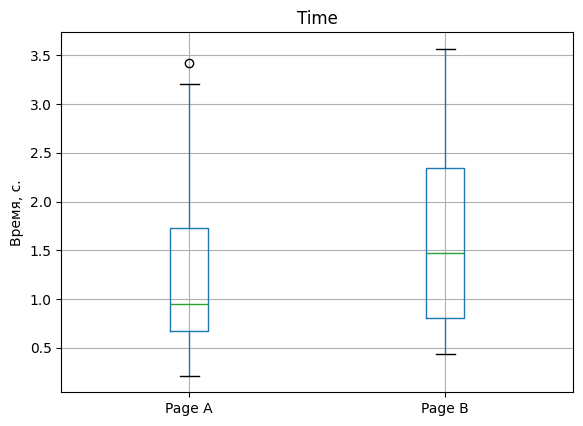

In [5]:
ax = web_pages_df.boxplot(by='Page', column='Time')
ax.set_xlabel('')
ax.set_ylabel('Время, с.')
plt.suptitle('')

Коробчатая диаграмма говорит о том, что страница *B* приводит к более продолжительным сеансам, чем страница *А*. 

In [6]:
mean_a = web_pages_df[web_pages_df.Page == 'Page A'].Time.mean()
print(f'Среднее время для страницы А: {mean_a}')
mean_b = web_pages_df[web_pages_df.Page == 'Page B'].Time.mean()
print(f'Среднее время для страницы B: {mean_b}')

print(f'Разница между страницами A и B {mean_b - mean_a}')

Среднее время для страницы А: 1.2633333333333332
Среднее время для страницы B: 1.62
Разница между страницами A и B 0.3566666666666669


#### Врменеа сеансов страницы *B* продолжительнее в среднем на 21,4 секунды в отличие от страницы *А*. Вопрос в том, находится ли эта разница внутри диапазона того, что может быть **порождено случайностью**, или, же напротив является **статистически значимой?** Один из путей - это применение перестановочного теста: *объединить все времена сеансов , затем многократно пертасовать и поделить их на группы, состоящие из 21 элемента (вспомним, что n = 21 для страницы А) и из 15 элементов (n = 15 для B )*

### Указанная функция отбирает nb индексы без возврата и относит их к группе B, оставшиеся na индексы назначаются группе A. Данная функция возвращает разницу между двумя средними. Вызов этой функции *R=1000* раз и установка *na = 21* и *nb = 15* приводят к распределению разниц во временах сенансов, которые изображены с помощью функции hist.

In [7]:
# Создаем функцию, которая случайно назначает 36 времен сеансов группе из 21 элемента (Страница А) и группе из 15 элементов (страница B)
import random

def perm_func(x, nA, nB):
    # n - общее количество элементов (36)
    # Все сеансы рассматриваются как единое множество перед случайным разбиением.
    n: int = nA + nB
    # random.sample(range(n), nB) выбирает случайные nB индексов (15) для группы B.
    idx_B: list = random.sample(range(n), nB)
    # set — это неупорядоченное множество уникальных элементов в Python.
    # Оно позволяет выполнять операции над множествами, такие как разность (-), объединение (|), пересечение (&).
    idx_A: list = list(set(range(n)) - set(idx_B))  # Остальные индексы для A
    # Возвращаем разницу между двумя средними
    return x.iloc[idx_B].mean() - x.iloc[idx_A].mean()

In [8]:
perm_diffs = [perm_func(web_pages_df.Time, nA=21, nB=15) for _ in range(1_000)]
print(type(perm_diffs))
print(len(perm_diffs))

<class 'list'>
1000


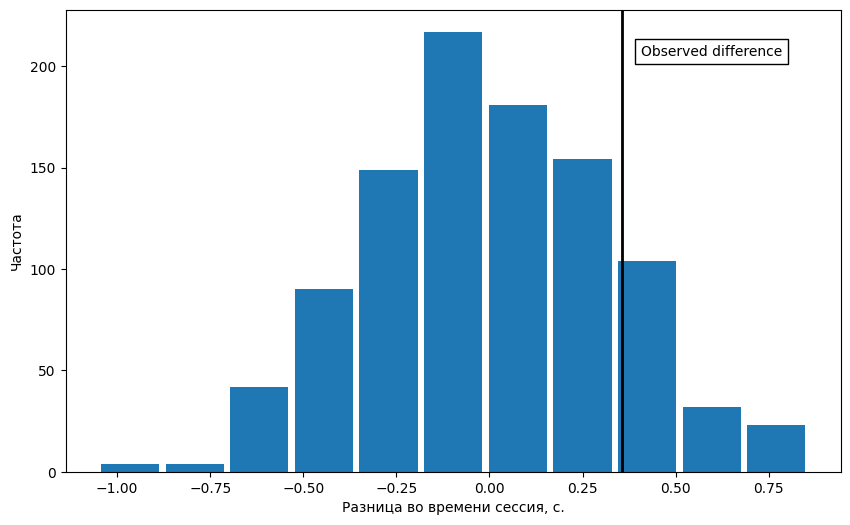

In [11]:
perm_diffs = [perm_func(web_pages_df.Time, nA=21, nB=15) for _ in range(1_000)]

fig, ax = plt.subplots(figsize=(10, 6))
# bins=11 - количество столбцов, rwidth=0.9 - ширина сторбцов
ax.hist(perm_diffs, bins=11, rwidth=0.9)
# Добавляем вертикальную линию на график в точке mean_b - mean_a.
# x = mean_b - mean_a — координата по оси X, где будет нарисована линия.
# lw=2 (или linewidth=2) — толщина линии 2 пикселя.
ax.axvline(x = mean_b - mean_a, color='black', lw=2)
ax.text(mean_b - mean_a + 0.05, max(ax.get_ylim()) * 0.9,  
        'Observed difference', bbox={'facecolor': 'white'})

ax.set_xlabel('Разница во времени сессия, с.')
ax.set_ylabel('Частота')

plt.show()

In [13]:
import numpy as np

np.mean(perm_diffs > (mean_b - mean_a))

np.float64(0.146)

## Статистическая значимость и p-значения
* p-Значения
* Альфа
    * Разногласия по поводу p-значения
    * Практическая значимость
* Ошибки 1-го и 2-го рода
* Наука о данных и *p*-значения

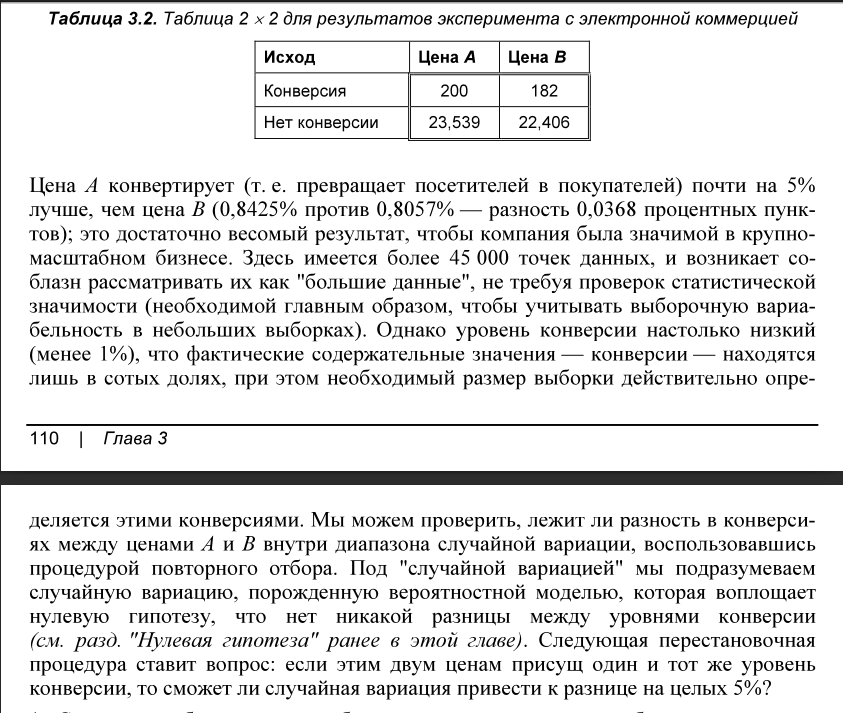

1. Поместить карточки, помеченные 1 и 0, в коробку: она будет представлять предполанаемую совместную интенсивность конверсии *382 единиц* (200 + 182) и *45945 нулей* (23539+ 22406): 0,008246 = 0,8246%.
2. Перетасовать и извлечь повторную выборку размера 23739 (число *n* такое же, что и у цены *А*), записать число единиц.
3. Записать число единиц в оставшиеся 22588 (число *n* такое же, что и у цены *B*).
4. Записать разницу в доле единиц.
5. Повторить шаги 2-4.
6. Ответить на вопрос: как часто наблюдалась разница >= 0,0368?

In [ ]:
'''
200/23739 — доля успешных конверсий в первой группе (200 из 23 739).
182/22588 — доля успешных конверсий во второй группе (182 из 22 588).
(200/23739 - 182/22588) — разница в доле конверсий между двумя группами.
100 * (...) — переводим разницу в проценты.
:.4f — форматирование числа с 4 знаками после запятой.
'''
obs_pct_diff = 100 * (200/23739 - 182/22588)
print(f'Наблюдаемая разница: {obs_pct_diff:.4f}%')

'''
[0] * 45945 — создаёт список из 45 945 элементов со значением 0 (не было конверсии).
[1] * 382 — создаёт список из 382 элементов со значением 1 (была конверсия).
.extend([...]) — добавляет конверсии 1 в конец списка.
'''
conversion = [0] * 45945
conversion.extend([1] * 382)
conversion = pd.Series(conversion)
conversion.head()

Наблюдаемая разница: 0.0368%


0    0
1    0
2    0
3    0
4    0
dtype: int64

In [17]:
perm_diffs_2 = [100 * perm_func(conversion, nA = 23739, nB=22588) for _ in range(1_000)]

In [18]:
perm_diffs_2

[np.float64(-0.08859555266378842),
 np.float64(0.015079729022603183),
 np.float64(0.09283619028739683),
 np.float64(-0.06267673224219054),
 np.float64(-0.0021994845917954614),
 np.float64(-0.010839091398994784),
 np.float64(0.0841965834801976),
 np.float64(-0.15771240712138282),
 np.float64(-0.11451437308538621),
 np.float64(-0.07995594585658919),
 np.float64(-0.019478698206194106),
 np.float64(-0.010839091398994784),
 np.float64(0.06691736986579894),
 np.float64(0.032358942637001654),
 np.float64(-0.14907280031418352),
 np.float64(-0.05403712543499122),
 np.float64(-0.11451437308538621),
 np.float64(0.006440122215403861),
 np.float64(0.0496381562514003),
 np.float64(-0.14907280031418352),
 np.float64(-0.010839091398994784),
 np.float64(-0.0021994845917954614),
 np.float64(0.09283619028739683),
 np.float64(0.1446738311305926),
 np.float64(0.0496381562514003),
 np.float64(-0.10587476627818707),
 np.float64(0.015079729022603183),
 np.float64(-0.09723515947098775),
 np.float64(0.006440122

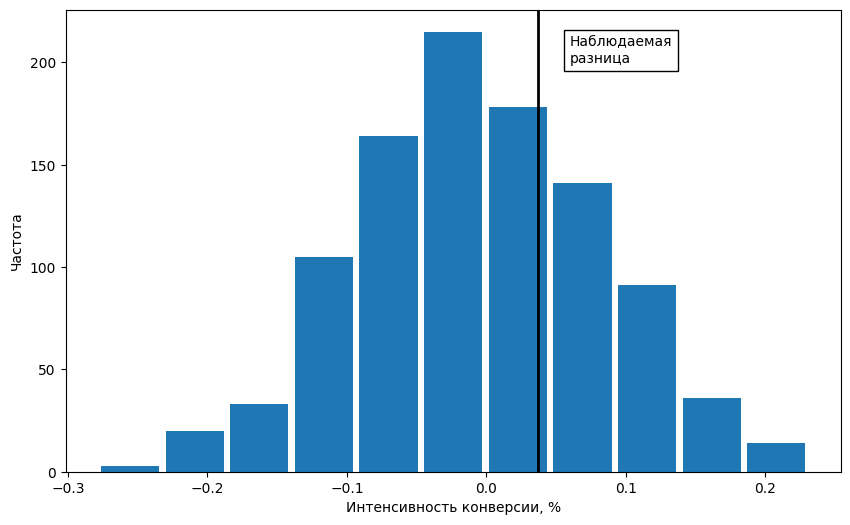

In [19]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.hist(perm_diffs_2, bins=11, rwidth=0.9)
ax.axvline(x=obs_pct_diff, color='black', lw=2)
ax.text(0.06, 200, 'Наблюдаемая\nразница', bbox={'facecolor' : 'white'})
ax.set_xlabel('Интенсивность конверсии, %')
ax.set_ylabel('Частота')

plt.show()

### *p-Значение*

In [25]:
[diff > obs_pct_diff for diff in perm_diffs_2]

[np.False_,
 np.False_,
 np.True_,
 np.False_,
 np.False_,
 np.False_,
 np.True_,
 np.False_,
 np.False_,
 np.False_,
 np.False_,
 np.False_,
 np.True_,
 np.False_,
 np.False_,
 np.False_,
 np.False_,
 np.False_,
 np.True_,
 np.False_,
 np.False_,
 np.False_,
 np.True_,
 np.True_,
 np.True_,
 np.False_,
 np.False_,
 np.False_,
 np.False_,
 np.False_,
 np.True_,
 np.True_,
 np.False_,
 np.True_,
 np.False_,
 np.False_,
 np.False_,
 np.False_,
 np.False_,
 np.True_,
 np.False_,
 np.True_,
 np.True_,
 np.False_,
 np.False_,
 np.True_,
 np.True_,
 np.True_,
 np.False_,
 np.True_,
 np.False_,
 np.False_,
 np.False_,
 np.True_,
 np.True_,
 np.False_,
 np.False_,
 np.True_,
 np.True_,
 np.False_,
 np.True_,
 np.False_,
 np.False_,
 np.True_,
 np.True_,
 np.False_,
 np.False_,
 np.False_,
 np.False_,
 np.True_,
 np.True_,
 np.False_,
 np.False_,
 np.True_,
 np.True_,
 np.False_,
 np.False_,
 np.False_,
 np.True_,
 np.False_,
 np.False_,
 np.False_,
 np.False_,
 np.False_,
 np.False_,
 np.True_

In [ ]:
'''
    [diff > obs_pct_diff for diff in perm_diffs_2]
Создаёт список логических значений (True / False), где True, если diff > obs_pct_diff, и False, если нет.
perm_diffs_2 — список разниц конверсий, полученных случайными перестановками.
obs_pct_diff — наблюдаемая разница в конверсии.
    np.mean(...)
Преобразует True в 1 и False в 0.
Считает среднее значение (долю True).
Это доля перестановок, где разница больше, чем наблюдаемая, то есть p-value.
'''
np.mean([diff > obs_pct_diff for diff in perm_diffs_2])

np.float64(0.304)

*Истина = 1, ложь = 0
p-Значение составляет 0,304, а значит, мы ожидаемо будем достигать такого же предельного результата, как и этот, или более предельного в силу случайности, превышающей 30% времени*

In [23]:
survivors = np.array([[200, 23739 - 200], [182, 22588 - 182]])
survivors

array([[  200, 23539],
       [  182, 22406]])

In [ ]:
'''
survivors — это таблица сопряжённости (contingency table), содержащая наблюдаемые частоты для двух категориальных переменных.
    Функция chi2_contingency() вычисляет:
chi2 — значение статистики хи-квадрат.
p_value — p-значение теста (двустороннее).
df — число степеней свободы.
_ — ожидаемые частоты (мы их не используем).
p_value / 2

Деление на 2 используется для одностороннего теста, так как chi2_contingency() возвращает двустороннее p-значение.
Это имеет смысл, если нас интересует только увеличение или уменьшение частот в одном направлении, а не любое отклонение.'''
chi2, p_value, df, _ = scipy.stats.chi2_contingency(survivors)
print(f'p-Значение для одностороннего теста: {p_value / 2:.4f}')

p-Значение для одностороннего теста: 0.3498


**Если p-value < 0.05 → Разница значима, можно отвергнуть нулевую гипотезу.
Если p-value > 0.05 → Нет статистически значимой разницы, эффект мог быть случайным.**

## Проверка на основе t-статистики

In [4]:
web_pages_df.head(3)

,Page,Time
0,Page A,0.21
1,Page B,2.53
2,Page A,0.35


In [7]:
web_pages_df.shape

(36, 2)

In [8]:
for i, j in enumerate(web_pages_df[web_pages_df.Page == 'Page A'].Time):
    print(i, j)

0 0.21
1 0.35
2 0.67
3 2.11
4 1.32
5 0.68
6 3.21
7 1.47
8 0.95
9 0.45
10 1.18
11 3.42
12 1.97
13 0.39
14 0.65
15 1.73
16 0.74
17 0.86
18 1.18
19 2.06
20 0.93


In [10]:
type(web_pages_df[web_pages_df.Page == 'Page A'].Time)

pandas.core.series.Series

In [9]:
for i, j in enumerate(web_pages_df[web_pages_df.Page == 'Page B'].Time):
    print(i, j)

0 2.53
1 0.71
2 0.85
3 2.46
4 1.49
5 0.75
6 3.33
7 1.87
8 1.26
9 0.48
10 1.47
11 3.57
12 2.23
13 0.43
14 0.87


In [11]:
type(web_pages_df[web_pages_df.Page == 'Page B'].Time)

pandas.core.series.Series

In [12]:
'''t-тест для независимых выборок с помощью scipy.stats.ttest_ind.'''
'''– Тест проверяет гипотезу:  
H₀ (нулевая гипотеза): среднее время на Page A и Page B одинаково.  
H₁ (альтернативная гипотеза): среднее время отличается.'''

'''Создаётся две выборки из датафрейма web_pages_df, содержащего время (Time), проведённое на двух веб-страницах (Page A и Page B).'''
res = scipy.stats.ttest_ind(web_pages_df[web_pages_df.Page == 'Page A'].Time, # -> pandas.Series
                            web_pages_df[web_pages_df.Page == 'Page B'].Time, # -> pandas.Series
                            equal_var=False) # equal_var=False указывает, что дисперсии двух групп могут быть разными (используется t-тест Уэлча).
# res.pvalue / 2 делит p-значение пополам, потому что в коде рассматривается односторонний тест.
print(f'p-Значение для одностроннего теста: {res.pvalue / 2:.4f}')

p-Значение для одностроннего теста: 0.1408


*p-значение = 0,1408 > 0.05:   
При уровне значимости α = 0.05 мы не можем отвергнуть нулевую гипотезу.  
Это означает, что нет статистически значимого различия во времени, проведённом на страницах Page A и Page B.  
Другими словами, на основе имеющихся данных нельзя утверждать, что пользователи проводят разное количество времени на этих страницах. Однако это не означает, что разницы точно нет — просто текущих данных недостаточно, чтобы её подтвердить.*

## Множественное тестирование

## Степени свободы

## Дисперсионный анализ
* F-статистика
* Двухсторонний дисперсионный анализ

In [1]:
import pandas as pd

In [3]:
data = {
    'Page 1': [164, 172, 177, 156, 195],
    'Page 2': [178, 191, 182, 185, 177],
    'Page 3': [175, 193, 171, 163, 176],
    'Page 4': [155, 166, 164, 170, 168]
}

df_variance = pd.DataFrame(data, index=['customer 1', 'customer 2', 'customer 3', 'customer 4', 'customer 5'])

df_variance

,Page 1,Page 2,Page 3,Page 4
customer 1,164,178,175,155
customer 2,172,191,193,166
customer 3,177,182,171,164
customer 4,156,185,163,170
customer 5,195,177,176,168


In [28]:
df_variance_mean = df_variance.copy()
df_variance_mean

,Page 1,Page 2,Page 3,Page 4
customer 1,164,178,175,155
customer 2,172,191,193,166
customer 3,177,182,171,164
customer 4,156,185,163,170
customer 5,195,177,176,168


In [29]:
# Проверяем, есть ли уже строка "Mean", и удаляем её
if "Mean" in df_variance_mean.index:
    df_variance_mean = df_variance_mean.drop(index="Mean")
    
# Добавляем сумму по столбцам в новую строку "Mean"
df_variance_mean.loc['Mean'] = df_variance_mean.mean()
df_variance_mean

,Page 1,Page 2,Page 3,Page 4
customer 1,164.0,178.0,175.0,155.0
customer 2,172.0,191.0,193.0,166.0
customer 3,177.0,182.0,171.0,164.0
customer 4,156.0,185.0,163.0,170.0
customer 5,195.0,177.0,176.0,168.0
Mean,172.8,182.6,175.6,164.6


In [30]:
# Проверяем, есть ли уже строка "Mean of means", и удаляем её
if "Mean of means" in df_variance_mean.index:
    df_variance_mean = df_variance_mean.drop(index="Mean of means")
    
# Добавляем сумму по столбцам в новую строку "Mean of means"
df_variance_mean.loc['Mean of means'] = df_variance_mean.loc['Mean'].mean(axis=0)
df_variance_mean

,Page 1,Page 2,Page 3,Page 4
customer 1,164.0,178.0,175.0,155.0
customer 2,172.0,191.0,193.0,166.0
customer 3,177.0,182.0,171.0,164.0
customer 4,156.0,185.0,163.0,170.0
customer 5,195.0,177.0,176.0,168.0
Mean,172.8,182.6,175.6,164.6
Mean of means,173.9,173.9,173.9,173.9


In [7]:
# Преобразуем DataFrame в "длинный" формат для seaborn
df_long = df_variance.melt(var_name='Page', value_name='Time')
df_long

,Page,Time
0,Page 1,164
1,Page 1,172
2,Page 1,177
3,Page 1,156
4,Page 1,195
5,Page 2,178
6,Page 2,191
7,Page 2,182
8,Page 2,185
9,Page 2,177


/tmp/ipykernel_6265/909198548.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Page', y='Time', data=df_long, palette='Set2')


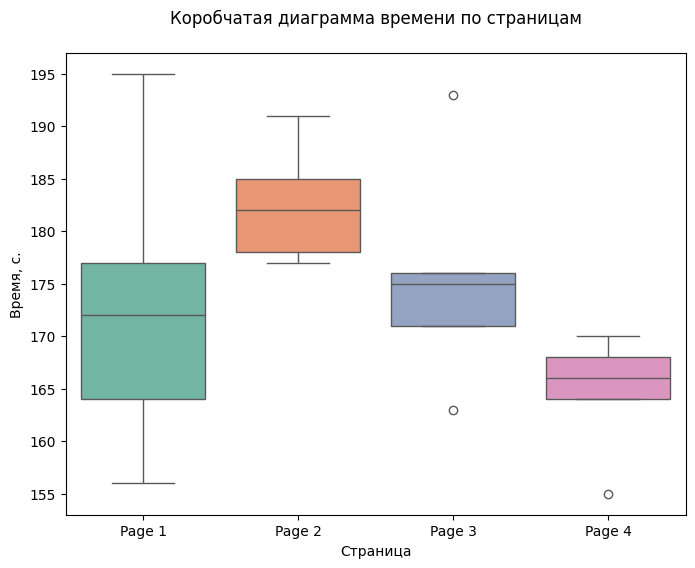

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

# Строим коробчатую диаграмму
plt.figure(figsize=(8, 6))
sns.boxplot(x='Page', y='Time', data=df_long, palette='Set2')

# Добавляем заголовок и подписи осей
plt.title('Коробчатая диаграмма времени по страницам\n')
plt.xlabel('Страница')
plt.ylabel('Время, с.')

# Показываем график
plt.show()

**Процедура дисперсионного анализа (ANOVA - Analysis of Variance)**  
Используется для сравнения средних значений трёх или более групп. Основная цель ANOVA — определить, есть ли статистически значимые различия между средними значениями этих групп.

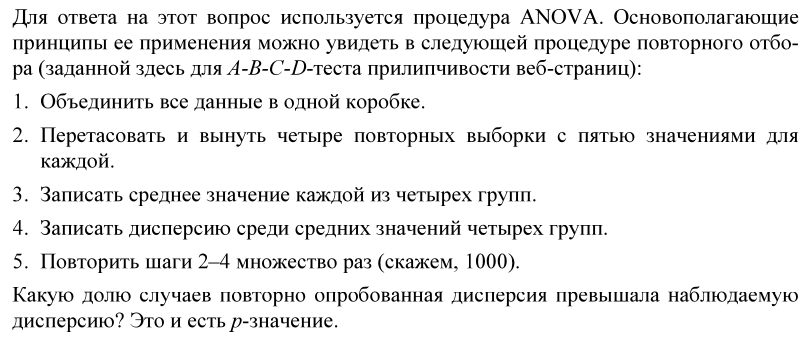

1. `df_long.groupby('Page')`  
**Что делает**: Группирует данные в DataFrame df_long по столбцу 'Page'. Это означает, что все строки с одинаковым значением в столбце 'Page' будут объединены в группы.  
**Результат**: Возвращает объект DataFrameGroupBy, который можно использовать для дальнейших операций (например, вычисления среднего, суммы и т.д.).

2. `.mean()`  
**Что делает**: Вычисляет среднее значение для каждой группы, созданной на предыдущем шаге. В данном случае, для каждой страницы (`Page`) будет вычислено среднее значение времени (`Time`).  
**Результат**: Возвращает новый `DataFrame`, где индекс — это уникальные значения из столбца `'Page'`, а столбец — средние значения.

3. `.var()`  
**Что делает**: Вычисляет **дисперсию (variance)** для столбца `'Time'` в DataFrame, полученном на предыдущем шаге. Дисперсия измеряет разброс значений вокруг среднего.  
**Результат**: Возвращает число (скалярное значение), представляющее дисперсию средних значений времени для всех страниц.

4.  `.iloc[0]`  
**Что делает**: Извлекает первое (и единственное) значение из `Series`, возвращенного методом `.var()`. В данном случае это значение дисперсии.  
**Результат**: Возвращает число (дисперсию).

In [37]:
observed_variance = df_long.groupby('Page').mean().var().iloc[0]

1. `df_long.groupby('Page')`
**Что делает**: Группирует данные в DataFrame df_long по столбцу `'Page'`. Все строки с одинаковым значением в столбце `'Page'` объединяются в группы.  
**Результат**: Возвращает объект DataFrameGroupBy.

2. `.mean()`
**Что делает**: Вычисляет среднее значение для каждой группы, созданной на предыдущем шаге. В данном случае, для каждой страницы (Page) вычисляется среднее значение времени (Time).
**Результат**: Возвращает новый DataFrame, где индекс — это уникальные значения из столбца 'Page', а столбец — средние значения.

3. `.values`  
**Что делает**: Преобразует DataFrame в массив NumPy. Каждая строка DataFrame становится строкой массива.  
**Результат**: Возвращает двумерный массив NumPy. array([[172.8], [182.6], [175.6], [164.6]])

4. `.ravel()`  
**Что делает**: "Разворачивает" (преобразует) двумерный массив в одномерный. Это полезно, если вам нужно получить плоский массив значений.  
**Результат**: Возвращает одномерный массив NumPy. array([172.8, 182.6, 175.6, 164.6])

In [ ]:
print('Observed means:', df_long.groupby('Page').mean().values.ravel()) # Наблюдаемые средние значения
print('Variance:', observed_variance) # Наблюдаемая дисперсия средних:

Observed means: [172.8 182.6 175.6 164.6]
Variance: 55.426666666666655


**`df['Time'] = np.random.permutation(df['Time'].values)`**
1. `df['Time'].values`:  
    * Извлекает значения столбца `'Time'` из DataFrame `df` в виде массива NumPy.
    * **Пример**: если `df['Time']` содержит *[164, 172, 177, 156, 195]*, то `df['Time'].values` вернет *array([164, 172, 177, 156, 195])*.

2. `np.random.permutation(...)`:  
    * Функция `np.random.permutation` принимает массив и возвращает его перемешанную (переставленную) версию. Перестановка происходит случайным образом.  
    * **Пример**: если на вход подать `array([164, 172, 177, 156, 195])`, то на выходе может получиться `array([172, 164, 195, 156, 177])`.

3. `df['Time'] = ...:`  
    * Заменяет значения столбца 'Time' в DataFrame df на перемешанные значения, полученные на предыдущем шаге.  
    * Теперь столбец 'Time' содержит те же значения, но в случайном порядке.

In [42]:
import numpy as np

# Permutation test example with stickiness
def perm_test(df):
    # Создаеv глубокую копию DataFrame
    df = df.copy()

    df['Time'] = np.random.permutation(df['Time'].values)
    return df.groupby('Page').mean().var().iloc[0]

In [ ]:
perm_variance = [perm_test(df_long) for _ in range(3_000)]
'''p-value, полученное в результате перестановочного теста. Оно показывает вероятность того, что случайная перестановка данных даст дисперсию средних,
превышающую наблюдаемую дисперсию.'''
print('Pr(Prob)', np.mean([var > observed_variance for var in perm_variance]))

Pr(Prob) 0.073


#### ВЫВОД
**Анализ результатов**:  
1. Наблюдаемые средние значения:
    * Средние значения времени для страниц отличаются:  
        * Page 2 имеет наибольшее среднее время (182.6).  
        * Page 4 имеет наименьшее среднее время (164.6).  
    * Разница между максимальным и минимальным средним значением составляет 18.0 (182.6 - 164.6).  
2. Наблюдаемая дисперсия:  
    * Дисперсия средних значений равна 55.43. Это указывает на то, что средние значения времени для страниц различаются.  
3. Результат перестановочного теста:
    * p-value = 0.073.
    * Это означает, что в 7.3% случаев случайная перестановка данных даст дисперсию средних, превышающую наблюдаемую дисперсию.
<hr>

**Статистические выводы**:
1. Уровень значимости:  
    * Обычно в статистике используется уровень значимости 0.05 (5%). Если p-value меньше 0.05, результаты считаются статистически значимыми.  
    * В данном случае p-value = 0.073, что больше 0.05.  
2. Интерпретация:  
    * Наблюдаемые различия в средних значениях времени для страниц не являются статистически значимыми на уровне значимости 0.05.  
    * Это означает, что мы не можем отвергнуть нулевую гипотезу о том, что все страницы имеют одинаковое среднее время загрузки.  
3. Практический вывод:  
    * Хотя средние значения времени для страниц различаются, эти различия могут быть случайными и не обусловлены систематическими факторами.  
    * Для более точного анализа можно:  
        * Увеличить размер выборки.  
        * Провести дополнительные тесты (например, попарные сравнения с поправкой на множественные сравнения).
<hr>

**Итог**:  
На основании проведённого анализа:  
* Наблюдаемые различия в средних значениях времени для страниц не являются статистически значимыми (p-value = 0.073 > 0.05).  
* Нулевая гипотеза о равенстве средних значений времени для всех страниц не отвергается.

<hr style="border: 0; height: 5px; background-color: Green;">

### *F* - статистика

In [9]:
import statsmodels.formula.api as smf

model = smf.ols('Time ~ Page', data=df_long).fit()
model

In [11]:
import statsmodels.api as sm

aov_table = sm.stats.anova_lm(model)
aov_table

,df,sum_sq,mean_sq,F,PR(>F)
Page,3.0,831.4,277.133333,2.739825,0.077586
Residual,16.0,1618.4,101.150000,NaN,NaN


<hr>

**Результат**:  
* df - степени свободы;
* sum_sq - сумма квадратов;
* mean_sq - средние квдараты (абревиатура для среднеквадратичных отклонений)
* F - *F*-статистика.  

Для общего среднего сумма квадратов - это отступление общего среднего от 0, возведенное в квадрат и умноженное на 20 (по числу наблюдений).  
Параметр степеней свободы для общего среднего по определению равен 1.  

**Page**:  
Для *вариантных* средних значений степени свободы равны 3 *(после того как определены три значения, а затем определено общее среднее, другое вариантное среднее варьироваться не может).* Сумма квадратов для *вариантных* средних - это сумма квадратичных отступлений между вариантными средними и общими средними.

**Residual**:  
Для остатков степени свободы равны 20 (все наблюдения могут варьироваться), и SS - это сумма вадратичных разниц между отдельными наблюдениями и вариантными средними. Средние квадраты (MS) - это сумма квадратов, деленная на степени свободы.

F-статистика = MS(вариант) / MS(Ошибка).

<hr style="border: 0; height: 5px; background-color: Red;">
<hr style="border: 0; height: 5px; background-color: Red;">

## Проверка на основе статистики хи-квадрат
* Проверка хи-квадрат: подход на основе повторного отбора
* Проверка хи-квадрат: статистическая теория
* Точный тест Фишера
* Релевантность для науки о данных

### Проверка хи-квадрат: на основе повторного отбора

**Остаток Пирсона задается формулой**:  

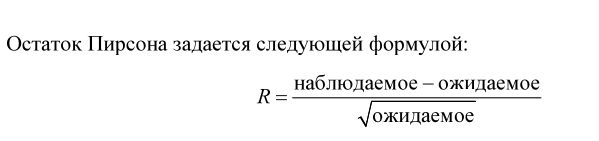

**Статистика хи-квадрат задается как сумма квадратичных пирсоновских остатков**:  
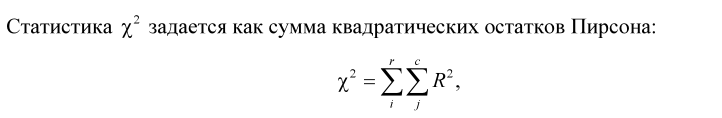

где *r* и *c* - это число строк и столбцов соответственно.

**Статистика хи-квадрат в этом случае = 1,66. Действительно ли это больше, чем может произойти в случайной модели?**  

**Проверяем при помощи алгоритма**:  
1. Положить в коробку 34 единицы (нажатия) и 2966 нулей (нажатия отсутствуют);
2. Перетасовать, извлечь три отдельные выборки по 1000 элементов и подсчитать нажатия в каждом;
3. Найти квадратичные разницы между перетасованными количествами и ожидаемыми количествами и их просуммировать;
4. Повторить шаги 2 и 3, скажем 1000 раз;
5. Как часто повторно отобранная сумма квадратичных отклонений превышает наблюдаемые? Этот показатель будет *p*-значением.

In [66]:
data = {
    'Headline_A' : [14, 986],
    'Headline_B' : [8, 992],
    'Headline_C' : [12, 988],
}

df_chi = pd.DataFrame(data, index=['Click', 'No-click'])
print("Результаты веб-тестирования для трех разных заголовков")

df_chi

Результаты веб-тестирования для трех разных заголовков


,Headline_A,Headline_B,Headline_C
Click,14,8,12
No-click,986,992,988


In [67]:
# Вычисляем среднее значение по строкам и заменяем все значения в строке на него
df_chi_null_hypothesis = df_chi.apply(lambda row: row.mean(), axis=1)
df_chi_null_hypothesis

Click        11.333333
No-click    988.666667
dtype: float64

In [68]:
# Преобразуем обратно в DataFrame с теми же колонками
'''Размножаем среднее значение на все колонки
В этом месте использован трюк с values[:, None], который превращает df_chi_null_hypothesis в двумерный массив (из [a, b] в [[a], [b]]).'''
df_chi_null_hypothesis = pd.DataFrame(df_chi_null_hypothesis.values[:, None] * [[1, 1, 1]], 
                              index=df_chi.index, 
                              columns=df_chi.columns)

# Форматируем числа до двух знаков после запятой
df_chi_null_hypothesis = df_chi_null_hypothesis.round(2)

print("Ожидается, если три заголовка имеют одинаковый процент нажатий (нулевая гипотеза)")
df_chi_null_hypothesis

Ожидается, если три заголовка имеют одинаковый процент нажатий (нулевая гипотеза)


,Headline_A,Headline_B,Headline_C
Click,11.33,11.33,11.33
No-click,988.67,988.67,988.67


#### Выполняем перестановочный тест

In [2]:
click_rate = pd.read_csv('/home/renat/Desktop/programming/data_science/books/prac_stat_for_ds_bruce_pratec/data/10_click_rates.csv')
clicks = click_rate.pivot(index='Click', columns='Headline', values='Rate')
clicks

Headline,Headline A,Headline B,Headline C
Click,,,
Click,14,8,12
No-click,986,992,988


In [76]:
clicks.values

array([[ 14,   8,  12],
       [986, 992, 988]])

In [5]:
import random

# Создаем список из 34 единиц
box = [1] * 34
# Создаем список из 2966 и добавляем в конец списка (метод extend() - давить в конец списка)
box.extend([0] * 2966)
# Перемешиваем список
random.shuffle(box)

def chi2 (observed, expected):
    pearson_residuals = []
    for row, expect in zip(observed, expected):
        pearson_residuals.append([(observe - expect) ** 2 / expect for observe in row])

    # return sum of squares
    return np.sum(pearson_residuals)

expected_clicks = 34/3
expected_noclicks = 1000 - expected_clicks
expected = [34/3, 1000 - 34/3]
chi2observed = chi2(observed=clicks.values, expected=expected)

def perm_fun(box):
    sample_clicks = [sum(random.sample(box, 1_000)),
                     sum(random.sample(box, 1_000)),
                     sum(random.sample(box, 1_000)),]
    sample_noclicks = [1000 - n for n in sample_clicks]
    return chi2 ([sample_clicks, sample_noclicks], expected)

perm_chi2 = [perm_fun(box=box) for _ in range(2_000)]
resampled_p_value = sum(perm_chi2 > chi2observed) / len(perm_chi2)

print(f'Наблюдаемое хи-квадрат: {chi2observed:.4f}')
print(f'Повторно отобранное p-значение: {resampled_p_value:.4f}')


Наблюдаемое хи-квадрат: 1.6659
Повторно отобранное p-значение: 0.4845


<hr style="border: 0; height: 5px; background-color: Green;">

### Проверка хи-квадрат: статистическая теория

In [7]:
import scipy.stats


chisq, pvalue, df, expected = scipy.stats.chi2_contingency(clicks)
print(f'Наблюдаемое хи-квадрат: {chi2observed:.4f}')
print(f'p-value: {pvalue:.4f}')

Наблюдаемое хи-квадрат: 1.6659
p-value: 0.4348


#### ВЫВОД  
Полученное p-значение немного меньше, чем p-значение повторного отбора: это вызвано тем, что распределение хи-квадрат является всего лишь аппроксимацией фактического распеределения статистики.

<hr style="border: 0; height: 5px; background-color: Green;">

### **Точный тест Фишера**
Если количества являются чрезвычайно низкими (однозначными, в особенности пять или меньше), то процедура на основе повторного отбора будет давать более точные *p-value*. Но также имеется процедура для фактического перечисления всех возможных перестановок, которые могут произойти, сводит в таблицу их частоы и точно определяет, насколько предельным является наблюдаемый результат - эта процедура называется **точным тестом Фишера**.

### Lady Tasting Tea

In [12]:
# РАЗОБРАТЬ ДЕЛО ТЕРЕЗЫ ИМАНИС-КАРИ
# Lady Tasting Tea
# Site: Stat Trek

<hr style="border: 0; height: 5px; background-color: Red;">
<hr style="border: 0; height: 5px; background-color: Red;">

## Алгоритм многорукого бандита

In [34]:
# Need Example


<hr style="border: 0; height: 5px; background-color: Red;">
<hr style="border: 0; height: 5px; background-color: Red;">

## Мощность и размерность выборки
* Размер выборки

In [25]:
from statsmodels.stats.proportion import proportion_effectsize
from statsmodels.stats.power import TTestIndPower

# Вычисляем размер эффекта для пропорций
effect_size = proportion_effectsize(0.0121, 0.011)

# Создаём объект анализа мощности
analysis = TTestIndPower()

# Вычисляем необходимый размер выборки
result = analysis.solve_power(effect_size=effect_size,
                              alpha=0.05, power=0.8, alternative='larger')

print(f'Размер выборки: {result:.3f}')
print('Размер выборки: %.3f' % result)


Размер выборки: 116602.391
Размер выборки: 116602.391
